__Análise exploratória do dataset e seleção e identificação de relevância das features do dataset - Dataset: Porto Alegre (cap. 1)__

Caio Azevedo, 27 de junho de 2021 - última atualização 30 de junho 2021

__Objetivos__:
- Melhor compreender o fenômeno de escorregamentos por meio da análise de suas features
- Identificação de métodos para identificação da relevância das features
- Análise __exploratória__ dos dados: identificação de possíveis atributos irrelevantes, dataset profiling, interpretação das features;  
- Identificação de possíveis features irrelevantes:
   - Matriz de correlação;
   - SelectKBest (F-test para pontuação das features - seleção de feture baseado em ANOVA para input numérico e saída categorica)
   - SelectPercentile (teste estatítisticos univariados)
   - Feature Importance (do RandomForestClassifier)
   - IGR (information gain ratio) - feature engineering;
      
__referências mendeley__:
- ref.1: New ensemble models for shallow landslide susceptibility modeling in a semi-aridwatershed
- ref.2: Spatial prediction models for shallow landslide hazards: a comparative assessment of the efficacy of support vector machines, artificial neural networks, kernel logistic regression, and logistic model tree
- ref.3: Landslide susceptibility mapping with r.landslide: A free open-source GIS-integrated tool based on Artificial Neural Networks
- ref.4: Attribute selection using correlations and principal components for artificial neural networks employment for landslide susceptibility assessment
- ref.5: Review of Input Variable Selection Methods for Artificial Neural Networks
- ref.6: Machine Learning Feature Selection Methods for Landslide Susceptibility Mapping
- ref.7: Support vector regression modeling of coal flotation based on variable importance measurements by mutual information method
- ref.8: Applied Predictive Modeling with Applications in R __livro com RFE, definições, etc__

__referências python e artigos__:

- ref.1: https://www.datasklr.com/ols-least-squares-regression/variable-selection  (somente casos de regressão)
- ref.2: https://machinelearningmastery.com/information-gain-and-mutual-information/
- ref.3: https://machinelearningmastery.com/calculate-feature-importance-with-python/
- ref.4: https://link.springer.com/article/10.1007/s00170-020-05641-y
- ref.5: https://www.sciencedirect.com/science/article/abs/pii/S096599781200004X
- ref.6: https://www.sciencedirect.com/science/article/pii/S2666546820300288
- ref.7: https://www.datacamp.com/community/tutorials/feature-selection-python
- ref.8: https://www.kdnuggets.com/2020/01/explaining-black-box-models-ensemble-deep-learning-lime-shap.html
- ref.9: https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c
- ref.10: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


In [44]:
import Rede_Neural as rna
from Rede_Neural import NeuralNetwork
from Rede_Neural import Layer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from utils.samples_generator import make_spiral, make_square, make_cubic, make_exp, make_log10
from utils import plot

%matplotlib inline

In [45]:
from pandas_profiling import ProfileReport

In [46]:
import os, sys
import pandas as pd
from sklearn.model_selection import train_test_split
APP_PATH = os.getcwd()

dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "Input_POA.csv"))) #Input_POA  diabetes spc_data_landslides
#dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "Input_RJ.csv")))
#dataset = dataset.sample(frac = 1) #embaralha os registros

dataset.head(5)

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
0,13.452180,127.04240,59.22540,2230,2741,6.376712,0.008905,0
1,15.656500,110.69380,203.50100,1320,2741,5.476123,0.065837,0
2,1.895332,215.47270,10.00250,2110,2790,10.594538,-0.020116,0
3,1.016567,39.76366,5.45029,1620,2790,10.741805,-0.003531,0
4,11.090160,178.25730,68.48230,1210,2742,7.579783,-0.000890,0


In [47]:
# split data into X and y - POA ou RJ
X = dataset

In [48]:
profile = ProfileReport(X, title="Análise das features da base do Guarujá")
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

__Seleção ou análise de relevância das features__
- ref. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

A seleção de features é um processo em que você seleciona automaticamente as features em seus dados que mais contribuem para a variável de previsão ou saída na qual se está interessado.

Ter features irrelevantes em seus dados pode diminuir a precisão de muitos modelos, especialmente algoritmos lineares como regressão linear e logística.

Três benefícios de realizar a seleção de recursos antes de modelar seus dados são:
- Reduz o overfitting: menos dados redundantes significa menos oportunidade de tomar decisões com base no ruído.
- Melhora a acurácia: menos dados enganosos significam que a precisão da modelagem melhora.
- Reduz o tempo de treinamento: menos dados significa que os algoritmos treinam mais rápido.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.
- Os métodos de seleção de features baseados em estatística envolvem a avaliação do relacionamento entre cada uma das variáveis de entrada e a variável de saída. Essa avaliação é feita por meio de técnicas estatísticas, cuja escolha está condicionada ao tipo dos dados de entrada e saída.

There are two main types of feature selection techniques: supervised and unsupervised, and supervised methods may be divided into wrapper, filter and intrinsic.
Filter-based feature selection methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features.
- Existem dois tipos principais de tecnicas de seleção de features: supervisionada e não supervisionada, e os métodos supervisionados podem ser divididos em wrapper, filtro e intrínsecos.
Os métodos baseados em filtros, utilizam medidas estatísticas para pontuar a correlação ou dependencia entre as variáveis de entrada que pode ser filtradas para selecionar aquelas de maior relevância. 
Quando a variável de saída é ignorada durante o processo de seleção de features, esse processo é dito não supervisionado, como por exemplo os métodos que removem variáveis reduntantes usando correlação.

Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. These methods are unconcerned with the variable types, although they can be computationally expensive. RFE is a good example of a wrapper feature selection method.

- Os métodos de seleção do tipo wrapper, criam diversos modelos com diferentes subconjunto de variáveis de entrada e seleciona aquelas features cujo resultado possue melhor desempenho mensurado por uma métrica previamente estabelecida. Esses métodos são computacionalmente custosos e não consideram o tipo de variáveis, sendo compatível com todos eles. RFE é um bom exemplo de um método wrapper.
- Os métodos de wrapper avaliam vários modelos usando procedimentos que adicionam e / ou removem variáveis para encontrar a combinação ideal que maximiza o desempenho do modelo. Em essência, os métodos de wrapper são algoritmos de pesquisa que tratam os preditores como entradas e utilizam o desempenho do modelo como saída a ser otimizada.

Filter methods evaluate the relevance of the predictors outside of the predictive models and subsequently model only the predictors that pass some criterion.
- Os métodos de __filtro__ avaliam a relevância dos preditores fora do contexto do modelo preditivo e, posteriormente, modelam apenas os preditores que passam por algum critério.  

- Finalmente, existem alguns algoritmos de aprendizado de máquina que realizam a seleção de features automaticamente como parte do aprendizado do modelo. Podemos nos referir a essas técnicas como métodos de seleção de features __intrínsecos ou embedded__. Alguns modelos contêm seleção de features integrados, o que significa que o modelo incluirá apenas preditores que ajudam a maximizar a precisão. Nesses casos, o modelo pode selecionar e escolher qual representação dos dados é a melhor.

A seleção de features também está relacionada a técnicas de redução dimensional em que ambos os métodos buscam menos variáveis de entrada para um modelo preditivo. A diferença é que a seleção de features seleciona recursos para manter ou remover do conjunto de dados, enquanto a redução de dimensionalidade cria uma __projeção dos dados__, resultando em features de entrada inteiramente novos. Como tal, a redução de dimensionalidade é uma alternativa à seleção de recursos, em vez de um tipo de seleção de recursos.

As medidas estatísticas usadas na seleção de features com base em filtro são geralmente calculadas uma variável de entrada por vez com a variável de saída. Como tal, são chamadas de __medidas estatísticas univariadas__. Isso pode significar que qualquer interação entre variáveis de entrada não é considerada no processo de filtragem

### Numerical Input, Categorical Output 

- Este é um problema de modelagem preditiva de classificação com variáveis de entrada numéricas.
Optamos por técnicas baseadas em correlação conforme xx, embora, neste caso, elas devam levar em consideração o alvo categórico. ANOVA correlation coefficient (linear).
O método ANOVA é um tipo de estatística F referida aqui como teste f ANOVA. Os resultados deste teste podem ser usados para seleção de recursos, onde os recursos que são independentes da variável de destino podem ser removidos do conjunto de dados.

- referencial sobre ANOVA: 
  - https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
  - https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476
  
- Algumas medidas estatísticas assumem propriedades das variáveis, como a de Pearson, que assume uma distribuição de probabilidade gaussiana para as observações e uma relação linear. Você pode transformar os dados para atender às expectativas do teste e tentar o teste independentemente das expectativas e comparar os resultados.

__Matriz de correlação de Pearson como critério para eliminação de features altamente relacionadas, vide modelo de análise proposto na dissertação.__

In [49]:
# encontra e remove as  features correlacionadas
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method ='pearson') 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(X, 0.8)
print(corr_features)
print('features correlacionadas: ', len(set(corr_features)) )

set()
features correlacionadas:  0


In [51]:
#matriz de correlação
corr = X.corr()
corr = corr.style.background_gradient(cmap='Blues')
corr

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
slope,1.000000,0.154444,0.703980,0.352061,0.254058,-0.374646,-0.192253,0.688218
aspect,0.154444,1.000000,0.167930,0.173592,0.127621,-0.018191,-0.020963,0.114137
elevation,0.703980,0.167930,1.000000,0.251171,0.334925,-0.475077,0.176686,0.562990
uso_solo,0.352061,0.173592,0.251171,1.000000,-0.088934,-0.046275,-0.115116,0.537551
lito,0.254058,0.127621,0.334925,-0.088934,1.000000,-0.030619,-0.081148,0.187511
twi,-0.374646,-0.018191,-0.475077,-0.046275,-0.030619,1.000000,-0.411193,-0.305372
curv,-0.192253,-0.020963,0.176686,-0.115116,-0.081148,-0.411193,1.000000,-0.058692
class,0.688218,0.114137,0.562990,0.537551,0.187511,-0.305372,-0.058692,1.000000


- __Como nenhuma das variáveis são correlacionadas (acima de 0.8), elas são consideradas independentes e por essse critério manteremos todas elas no nosso modelo__
- interessante que as variáveis elevação e declividade são os mais correlacionados o que faz total sentido, conforme confirmado com a Alessandra.
- declividade, elevação e uso do solo são as variáveis mais relacionadas com o escorregamento 'class'

In [52]:
# isola as features da variável target
X = dataset
y= dataset['class']
X = X.drop('class',axis=1)

In [53]:
# A common mistake done with feature selection is to search a subset of discriminative features on the full dataset 
#instead of only using the training set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

__Seleção de Features__ - sklearn.feature_selection classe SelectKBest, seleciona as k melhores features, falta melhor com o SelectPercentile
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection_pipeline.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-pipeline-py
- https://qastack.com.br/datascience/10773/how-does-selectkbest-work
- https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476 (sobre ANOVA)
- https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/ (mais sobre ANOVA e f-test)
- https://statisticsbyjim.com/anova/f-tests-anova/ (anova)

In [54]:
# #############################################################################
# seleção de features univariada com F-test para pontuação das features
# Adotou-se a seleção padrão para identificar as 4 features mais significativas (com base na análise anterior)
# Seleção de feature por ANOVA (análise de variância) para input numérico e output categorico
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# setup da classe KBestFeatures - k=4 features mais relevantes
fs = SelectKBest(score_func=f_classif, k=4)
# aplica a seleção de features
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(75, 4)


In [55]:
predictors = X_train.columns
predictors

Index(['slope', 'aspect', 'elevation', 'uso_solo', 'lito', 'twi', 'curv'], dtype='object')

In [56]:
fs.pvalues_

array([2.37843475e-12, 3.69760167e-01, 1.48178790e-07, 6.09572586e-07,
       8.93267908e-02, 9.90141599e-03, 3.23418849e-01])

In [57]:
fs.scores_

array([70.74329965,  0.81450441, 33.82973316, 29.88172704,  2.96486097,
        7.01480642,  0.98839571])

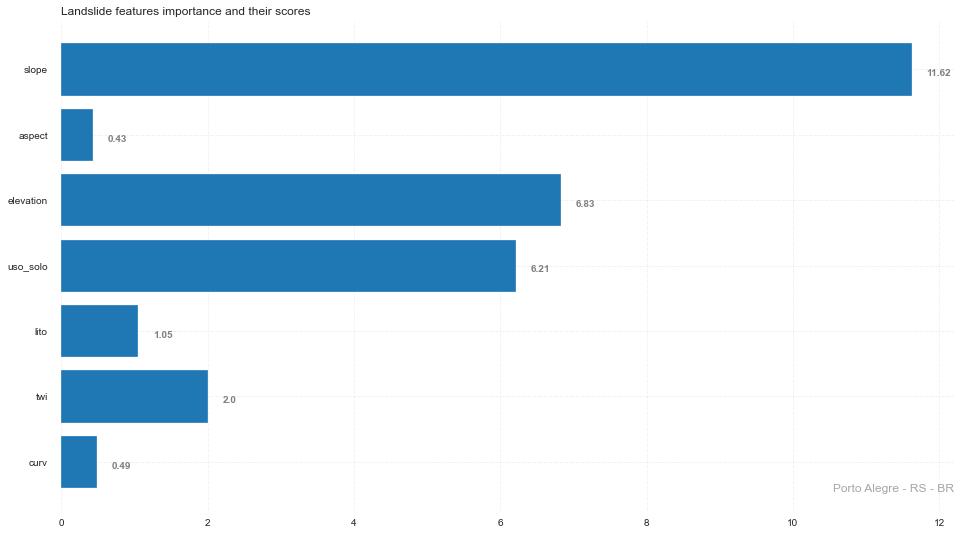

In [58]:
predictors = X_train.columns
# obtém os valores de p-values para cada feature e os transforma em 'pontos'
#scores = fs.pvalues_
scores = -np.log10(fs.pvalues_) #ouuu
#scores /= scores.max()

#scores = fs.scores_

# tamanho do gráfico
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(predictors, scores)
 
# Remove as spines dos eixos
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove os tickes dos eixos x, y
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# adiiona as gridlines x e y
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# exibe os valores nas barras
ax.invert_yaxis()
 
# pequenas anotações nas barras
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Titulo do gráfico
ax.set_title('Landslide features importance and their scores',
             loc ='left', )
 
# watermark
fig.text(0.9, 0.15, 'Porto Alegre - RS - BR', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# exibe o Plot
plt.show()

 - esse resultado do SelectKBest faz todo sentido com a matrix de correlação, onde as features aqui apontadas são aquelas de maior correlação com a coluna 'class', são elas:
    - slope | slope
    - elevation | elevation
    - uso solo | uso_solo
    - twi | twi
    - lito | lito
    - curv | aspect
    - aspect | curv

__Outra abordagem__

__Seleção de Features__ - sklearn.feature_selection classe SelectPercentile 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile
- https://python.hotexamples.com/pt/examples/sklearn.feature_selection/SelectPercentile/-/python-selectpercentile-class-examples.html

In [59]:
from sklearn.feature_selection import SelectPercentile

In [60]:
# um erro comum na seleção de features é a utilização de todo o dataset ao invés de usar apenas o subconjunto de treinamento.
X = dataset
y= dataset['class']
X = X.drop('class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
# define feature selection - o que seria esse percentile ?
fsP = SelectPercentile(score_func=f_classif, percentile=20)
# aplica a seleção de features
X_selected = fsP.fit_transform(X_train, y_train)
print(X_selected.shape)

(75, 2)


In [62]:
predictors = X.columns
predictors

Index(['slope', 'aspect', 'elevation', 'uso_solo', 'lito', 'twi', 'curv'], dtype='object')

In [63]:
fsP.scores_

array([70.74329965,  0.81450441, 33.82973316, 29.88172704,  2.96486097,
        7.01480642,  0.98839571])

In [64]:
# exibe as principais features
predictors = X.columns
nr_features = len(X.columns)
i = fsP.scores_.argsort()[::-1][:nr_features]
top_features = np.column_stack((predictors[i],
                                        fsP.scores_[i],
                                        fsP.pvalues_[i],
                                        -np.log10(fsP.pvalues_[i])
                                        ))

print("\nTop %i Features:" % nr_features)
features = pd.DataFrame(top_features, columns=["token", "score", "p-val","scored-p-val"])
print(features, "\n")


Top 7 Features:
       token     score        p-val scored-p-val
0      slope   70.7433  2.37843e-12      11.6237
1  elevation   33.8297  1.48179e-07      6.82921
2   uso_solo   29.8817  6.09573e-07      6.21497
3        twi   7.01481   0.00990142       2.0043
4       lito   2.96486    0.0893268      1.04902
5       curv  0.988396     0.323419     0.490235
6     aspect  0.814504      0.36976      0.43208 



In [65]:
features["normalized-scored-p-val"] = features["scored-p-val"]/features["scored-p-val"].max()
features["normalized-score"] = features["score"]/features["score"].max()
features

,token,score,p-val,scored-p-val,normalized-scored-p-val,normalized-score
0,slope,70.7433,2.37843e-12,11.6237,1,1
1,elevation,33.8297,1.48179e-07,6.82921,0.587525,0.478204
2,uso_solo,29.8817,6.09573e-07,6.21497,0.534681,0.422397
3,twi,7.01481,0.00990142,2.0043,0.172432,0.0991586
4,lito,2.96486,0.0893268,1.04902,0.0902482,0.0419101
5,curv,0.988396,0.323419,0.490235,0.0421754,0.0139716
6,aspect,0.814504,0.36976,0.43208,0.0371723,0.0115135


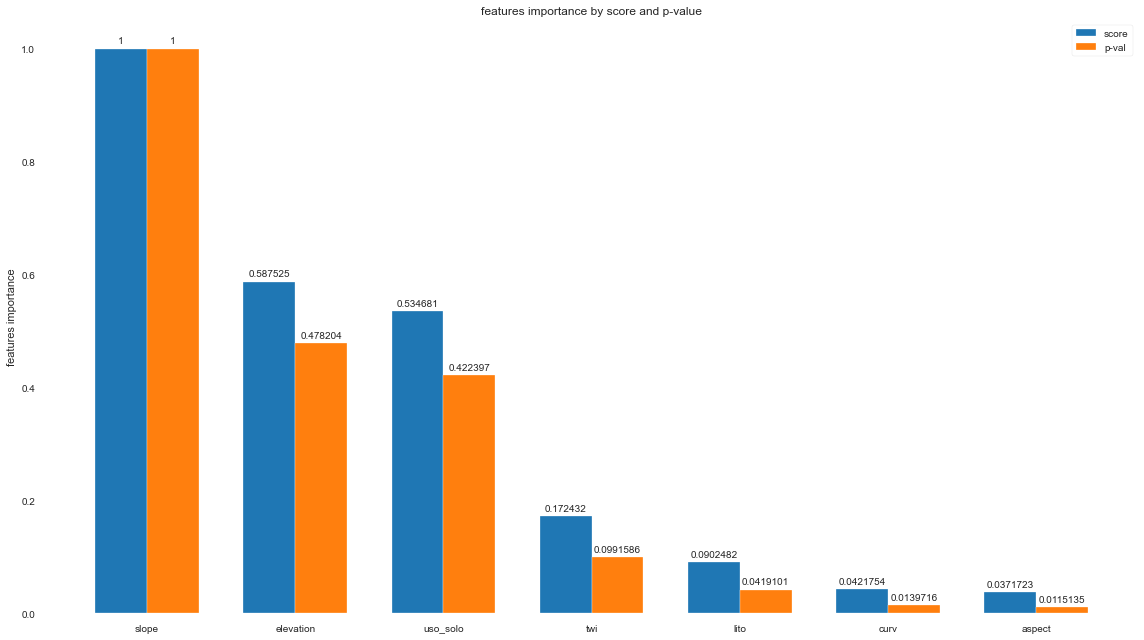

In [66]:
x = np.arange(len(features.index))  # the label locations
width = 0.35  # largura das barras
fig, ax = plt.subplots(figsize =(16, 9))

rects1 = ax.bar(x - width/2, features["normalized-scored-p-val"], width, label="score")
rects2 = ax.bar(x + width/2, features["normalized-score"], width, label='p-val')

ax.set_ylabel('features importance')
ax.set_title('features importance by score and p-value')
ax.set_xticks(x)
ax.set_xticklabels(features['token'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

### __Segue agora técnicas propostas pelo artigo abaixo__
- https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a

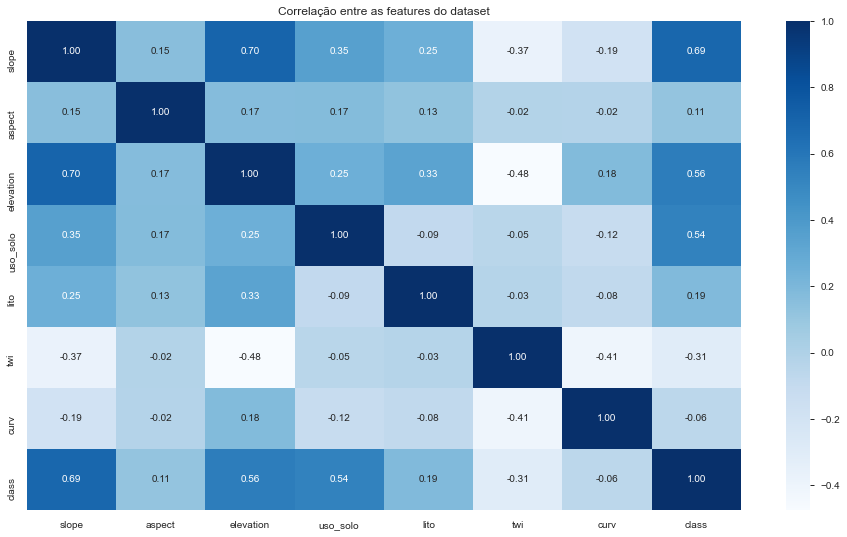

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))
sns.heatmap(dataset.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre as features do dataset')
plt.show()

In [68]:
X = dataset
y= dataset['class']
X = X.drop('class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### embedded ou intríseco tipo de seleção de features 
- Bagged decision trees, como Random Forest e Extra Trees, podem ser usadas para estimar a importância das features.
- ref. https://machinelearningmastery.com/feature-selection-machine-learning-python/

Text(0.5, 1.0, 'Importância de cada feature')

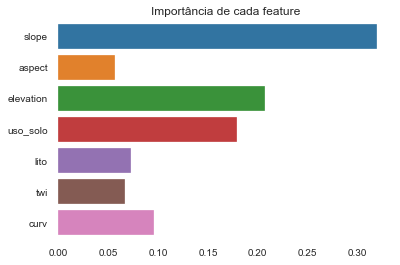

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import seaborn as sns 
predictors = X.columns
model  = RandomForestClassifier() 
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

 - esse resultado do feature_importances_ faz todo sentido com a matrix de correlação e SelectKBest, onde as features aqui apontadas são aquelas de maior correlação com a coluna 'class', são elas:
    - [correlação] | [SelectKBest] | [importance (embedded)]
    - slope        | slope         | slope  
    - elevation    | elevation     | elevation
    - uso solo     | uso_solo      | uso_solo
    - twi          | twi           | curv
    - lito         | lito          | twi
    - curv         | aspect        | lito
    - aspect       | curv          | aspect

Text(0.5, 1.0, 'Importância de cada feature')

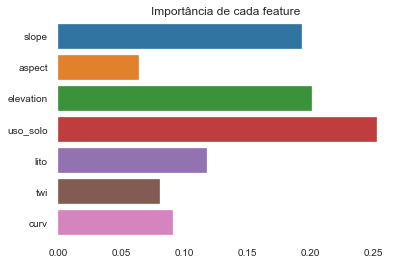

In [70]:
predictors = X.columns
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Text(0.5, 1.0, 'Importância de cada feature')

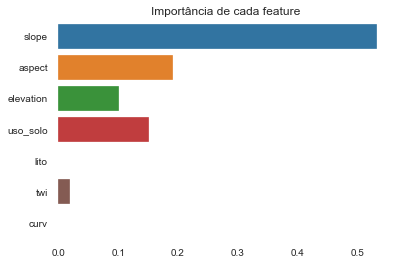

In [71]:
from sklearn.tree import DecisionTreeClassifier
predictors = X.columns
model = DecisionTreeClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

[13:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Caio\Miniconda3\envs\cashme\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Text(0.5, 1.0, 'Importância de cada feature')

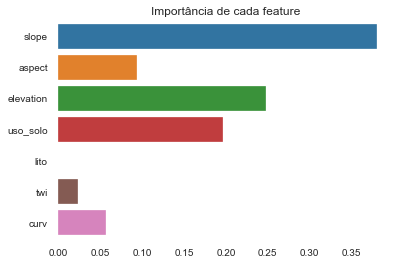

In [72]:
from xgboost import XGBClassifier
predictors = X.columns
model = XGBClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

### Recursive Feature Elimination (algoritmo do tipo wrapper para seleção de features)
- Recursive Feature Elimination (or RFE) funciona removendo recursivamente os atributos e construindo um modelo sobre os atributos que permanecem..

- Ele usa a acurácia do modelo para identificar quais atributos (e combinação de atributos) contribuem mais para prever a variável de destino.
- O algoritmo de classificação não importa muito, desde que ele seja consistente.
- Por ser um método de seleção do tipo wrapper, significa que um algoritmo de aprendizado de máquina diferente é fornecido e usado no núcleo do método. Este é empacotado pelo RFE e usado para ajudar a selecionar as features. Isso contrasta com as seleções de recursos com base em filtro que pontuam cada feature e selecionam as features com a maior (ou menor) pontuação.
- O RFE funciona procurando por um subconjunto de features, começando com todos elas no conjunto de dados de treinamento e removendo com sucesso as features até que o número desejado permaneça.

- __RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.__
- __The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.__
- __Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.__

 - https://machinelearningmastery.com/rfe-feature-selection-in-python/
 - https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [73]:
#https://machinelearningmastery.com/rfe-feature-selection-in-python/
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [74]:
X = dataset
y= dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
# Como utilizar RFE - DEMO
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Features Selecionadas: %s" % fit.support_)
print("Ranking das Features : %s" % fit.ranking_)
# summarize all features
for i in range(X_train.shape[1]):
    print('Coluna: %d, Selected %s, Rank: %s' % (i, rfe.support_[i], rfe.ranking_[i]))

Num Features: 4
Features Selecionadas: [ True False  True  True False False False  True]
Ranking das Features : [1 4 1 1 2 5 3 1]
Coluna: 0, Selected True, Rank: 1
Coluna: 1, Selected False, Rank: 4
Coluna: 2, Selected True, Rank: 1
Coluna: 3, Selected True, Rank: 1
Coluna: 4, Selected False, Rank: 2
Coluna: 5, Selected False, Rank: 5
Coluna: 6, Selected False, Rank: 3
Coluna: 7, Selected True, Rank: 1


- Python scikit-learn provides a Pipeline utility to help automate machine learning workflows. Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

In [76]:
# configuração do modelo
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=4)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# avaliação do modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), np.std(n_scores)))

Accuracy: 1.000 (0.000)


## usa um modelo com a combinação de todas as features do dataset e mede a performance

>2 1.000 (0.000)
>3 1.000 (0.000)
>4 1.000 (0.000)
>5 1.000 (0.000)
>6 1.000 (0.000)
>7 0.991 (0.033)


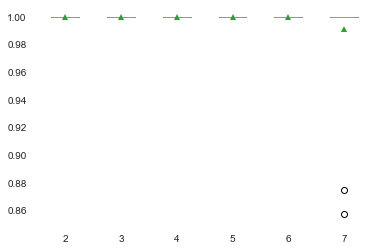

In [77]:
def get_model_features():
    models = dict()
    for i in range(2, 8):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# avalia um modelo por meio de cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# obtém as configurações do RFE em um algoritmo configurado para todas as features
models = get_model_features()
# avalia as diversas configurações de RFE
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model,  X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

- essa abordagem evidencia que não precisamos mais que 3 ou 4 features, conforme anteriormente 

## Agora testa vários modelos com a quantidade de features consideradas ideal

In [78]:
# apartir de uma lista de modelos..
#Sobre get_models function: 

#The logistic regression model is only used by the RFE to evaluate different subsets of features selected by the RFE.
#Inicialmente, a regressão logistica é utilizada pelo RFE para avaliar/selecionar as features selecionadas pelo RFE.
#Em seguinda o algoritmo utilizado em 'model' utiliza as features selecionadas pelo RFE e 'fita' o modelo.
#The decision tree will take the features selected by the RFE and fit a model.

## rf
#	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
#	model = DecisionTreeClassifier()
#	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
def get_models():
    models = dict()
    n_features = 4
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=n_features)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=n_features)
    model = Perceptron()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n_features)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=n_features)
    model = GradientBoostingClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [79]:
# avalia um determinado modelo usando cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>lr 0.979 (0.058)
>per 0.533 (0.116)
>cart 1.000 (0.000)
>rf 1.000 (0.000)
>gbm 1.000 (0.000)


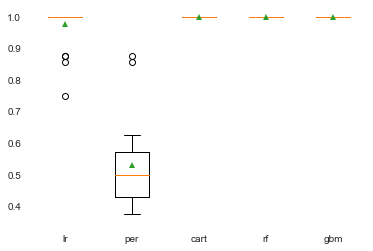

In [80]:
# recupera os modelos para avaliação
models = get_models()
# avalia os modelos e armazena os resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

__esse artigo merece ser lido__
- https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

__daqui em diante precisa de mais pesquisa__

__Seleção de Features__ - classe rulefit, não achei exemplos para clasificação binaria
- https://towardsdatascience.com/getting-more-from-regression-models-with-rulefit-2e6be8d77432
- http://statweb.stanford.edu/~jhf/ftp/RuleFit.pdf

In [38]:
from rulefit import RuleFit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [39]:
X = np.arange(100).reshape(-1,1)

# Sine Function
y = [np.sin(x/8) for x in np.arange(100)]

# Fit a linear model using X as the independent variable
lreg = linear_model.LinearRegression().fit(X,y)

# Record r2 score from linear model
lreg_score = np.round(lreg.score(X,y),2)

# Fit a RuleFit model using X as the independent variable and 100 rules max
rf = RuleFit(max_rules=250,random_state=1)
rf.fit(X, y, feature_names=['x'])
rules = rf.get_rules()

# Record r2 score from RuleFit model
rf_score = np.round(r2_score(rf.predict(X),y),2)

In [40]:
rules

,rule,type,coef,support,importance
0,x,linear,-0.000000,1.00,0.000000
1,x > 24.0 & x > 80.0,rule,-0.000000,0.18,0.000000
2,x > 53.0 & x > 46.0 & x > 25.5 & x <= 70.5,rule,0.075110,0.12,0.024408
3,x <= 76.0 & x > 48.5 & x > 22.5,rule,0.000000,0.30,0.000000
4,x > 24.5 & x <= 48.5,rule,-0.001175,0.18,0.000451
...,...,...,...,...,...
187,x <= 54.0 & x <= 73.0 & x <= 24.5,rule,0.000000,0.24,0.000000
188,x <= 23.5 & x <= 78.5,rule,0.000000,0.28,0.000000
189,x <= 78.0,rule,0.000000,0.78,0.000000
190,x > 24.5 & x <= 75.5 & x <= 54.0 & x > 46.5,rule,0.000000,0.06,0.000000


In [41]:
import statsmodels.api as sm
X_new = sm.add_constant(X)
model = sm.OLS(y, X_new).fit()
model.pvalues

array([4.38499163e-04, 5.70227869e-05])

In [42]:
selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_new = X[selected_features]
    X_new = sm.add_constant(X_new)
    model = sm.OLS(y,X_new).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_pmax)
    else:
        break
selected_features

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

https://levelup.gitconnected.com/neural-network-feature-importance-and-feature-effect-with-simple-scientific-trick-ffd6a453dab4

First, we need to create our constant values. What values do we pick? Generally, I recommend using the median values for each input. The median will allow you to avoid extreme inputs should you decide to select a row instead. In Python, you can do so by simply doing:

In [ ]:
X.median()

Now, let’s create all the variations in “slope”. For that, we need to know what the minimum and maximum values of “slope” is in our dataset, then create an array of variation between the min and max for submitting into our model.

In [ ]:
# create variables to store min and max value for "# of Rooms"
minimum, maximum = X['slope'].min(), X['slope'].max()
# create an evenly spaced array of 100 value between min and max
arr = np.arange(minimum, maximum, (maximum - minimum)/100)

Since we are only interested in “slope” for now, you will notice that it’s located on the 1st row, or 0th value in a python list (python lists always start at 0). So for us to vary “slope”, we will be modifying the 0th value in our python list, in the following fashion:

In [ ]:
# now create lst of all inputs
lst = []

# loop over each variation generated in array
for variation in arr:
    all_vals = list(X.median().values)
    
    # replace 0th value with variation
    all_vals[0] = variation
    
    # append variation with ceteris paribus to list of inputs
    lst.append(all_vals)
    
# transform lst into numpy array to fit model format for evaluation
lst = np.array(lst)

Great! Our list “lst” contains every variation of “# of Rooms” while everything else is held constant, at the median. Ceteris Paribus! Now, let’s submit our input “lst” into our model and check out the output.

__Daqui em diante preparamos os dados para  nenhuma das variáveis são correlacionadas (acima de 0.8), elas são consideradas independentes e por essse critério manteremos todas elas no nosso modelo__

In [ ]:
X = lst